# Data Preparation

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Referral_Join_Prediction.csv')

In [3]:
df.drop(columns=['referral_id'],inplace=True)

Drop referral_id column as it is not required

In [4]:
df.head(3)

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,28,5.0,Delhi,106,89.0,72,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,3,141,EL0,Yes
1,26,3.0,Pune,65,63.0,77,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,10,80,ML0,Yes
2,23,2.0,Mumbai,45,92.0,85,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,1,60,EL0,No


In [5]:
df['referral_10_th_marks'] = np.where(df['referral_10_th_marks'].isnull(),df['referral_10_th_marks'].mean(),df['referral_10_th_marks'])
df['referral_10_th_marks'] = np.where(df['referral_10_th_marks'] < 0,df['referral_10_th_marks'].mean(),df['referral_10_th_marks'])
df['referral_graduation_marks'] = np.where((df['referral_graduation_marks'].isnull()) | (df['referral_graduation_marks']< 0 ),df['referral_graduation_marks'].mean(),df['referral_10_th_marks'])
df[(df['referral_graduation_marks'].isnull()) | (df['referral_graduation_marks']< 0 )]

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined


In [6]:
df['referral_aptitude_numerical_score'] = np.where(df['referral_aptitude_numerical_score'].isnull(),-1,df['referral_aptitude_numerical_score'])
df['referral_aptitude_numerical_score'] = np.where(df['referral_aptitude_numerical_score']=='?',-1,df['referral_aptitude_numerical_score'])

df['referral_aptitude_numerical_score'] =df['referral_aptitude_numerical_score'].astype(float)

df['referral_aptitude_reasoning_score'] = np.where(df['referral_aptitude_reasoning_score'].isnull(),-1,df['referral_aptitude_reasoning_score'])
df['referral_aptitude_reasoning_score'] = np.where(df['referral_aptitude_reasoning_score']=='?',-1,df['referral_aptitude_reasoning_score'])

df['referral_aptitude_reasoning_score'] =df['referral_aptitude_reasoning_score'].astype(float)

In [7]:
df[df['referral_gender']=='?']

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
245,27,4.0,Mumbai,85,83.0,91,83.0,74.0,?,103.0,21.74,23.91,11.74,4.0,3,101,ML0,No


In [8]:
df['referral_gender'].max()

'Male'

In [9]:
df['referral_gender'] = np.where(df['referral_gender']=='?',df['referral_gender'].max(),df['referral_gender'])


In [10]:
df[df['referral_gender']=='?']

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined


In [11]:
cols = ['referral_post_grad_marks','referral_expected_sal','referral_expected_sal','referral_aptitude_numerical_score','referral_aptitude_verbal_score','referral_aptitude_reasoning_score','referral_Management_Interview_score']

for col in cols:
    df[col] = np.where((df[col].isnull()) | (df[col] < 0),df[col].mean(),df[col])

In [12]:
df.isnull().sum()

referral_age                           0
referral_exp_in_years                  0
referral_preferred_city                0
referral_current_salary                0
referral_10_th_marks                   0
referral_12th_marks                    0
referral_graduation_marks              0
referral_post_grad_marks               0
referral_gender                        0
referral_expected_sal                  0
referral_aptitude_numerical_score      0
referral_aptitude_verbal_score         0
referral_aptitude_reasoning_score      0
referral_Management_Interview_score    0
referral_HR_Interview_score            0
Salary offered                         0
Emp_Salary_Grade                       0
Joined                                 0
dtype: int64

In [13]:
num = []
cat = []

for col in df.columns:
    if df[col].dtype=='object':
        cat.append(col)
    else :
        num.append(col)


In [14]:
print('Categorical Columns : {}'.format(cat))

Categorical Columns : ['referral_preferred_city', 'referral_gender', 'Emp_Salary_Grade', 'Joined']


In [15]:
print('Numerical Columns : {}'.format(num))

Numerical Columns : ['referral_age', 'referral_exp_in_years', 'referral_current_salary', 'referral_10_th_marks', 'referral_12th_marks', 'referral_graduation_marks', 'referral_post_grad_marks', 'referral_expected_sal', 'referral_aptitude_numerical_score', 'referral_aptitude_verbal_score', 'referral_aptitude_reasoning_score', 'referral_Management_Interview_score', 'referral_HR_Interview_score', 'Salary offered']


# Scaling Method 1 (zscore)

In [16]:
from scipy.stats import zscore


In [17]:
z_scaled=df[num].apply(zscore)

In [18]:
z_scaled.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.085749e-16,9.878538e-17,-4.449792e-17,1.168515e-15,5.842576e-16,1.181420e-16,-8.080822e-16,3.666628e-16,4.583285e-17,-1.184201e-16,-1.263741e-16,-1.174745e-16,-2.227677e-17,9.166571e-17
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-2.498982e+00,-1.171107e+00,-1.170604e+00,-1.656266e+00,-5.995608e+00,-1.655236e+00,-1.746989e+00,-1.173312e+00,-1.644252e+00,-1.754718e+00,-1.754688e+00,-1.622621e+00,-8.464606e-01,-1.179563e+00
25%,-7.190903e-01,-7.875531e-01,-7.897520e-01,-8.970373e-01,-7.763793e-01,-8.950994e-01,-8.863596e-01,-7.975362e-01,-8.783234e-01,-8.277956e-01,-7.971391e-01,-9.369484e-01,-4.824935e-01,-7.990954e-01
50%,-7.133833e-03,-2.044594e-02,-2.804869e-02,5.199914e-02,-4.385598e-02,-1.189864e-02,-2.573054e-02,-9.722615e-02,-4.356474e-02,-8.235822e-03,-1.674821e-02,9.156072e-02,-1.185264e-01,-1.913773e-02
75%,7.048227e-01,7.466613e-01,7.526972e-01,9.061319e-01,8.717982e-01,9.102248e-01,9.783367e-01,5.860032e-01,8.788316e-01,8.826257e-01,7.957852e-01,7.772334e-01,4.274243e-01,7.417966e-01
max,1.352004e+01,1.455459e+01,1.459665e+01,2.424590e+00,1.604322e+00,2.430498e+00,2.173655e+00,1.300370e+01,1.801228e+00,1.773487e+00,4.880877e+00,1.462906e+00,1.917173e+01,1.457178e+01


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='referral_current_salary', ylabel='Density'>

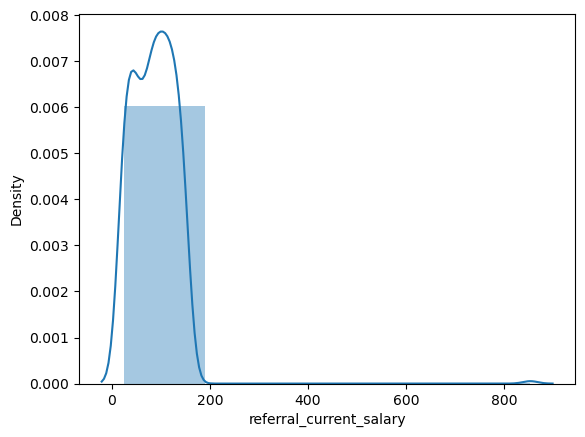

In [19]:
# Distribution before zscore encoding
sns.distplot(df['referral_current_salary'],bins=5)

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='referral_current_salary', ylabel='Density'>

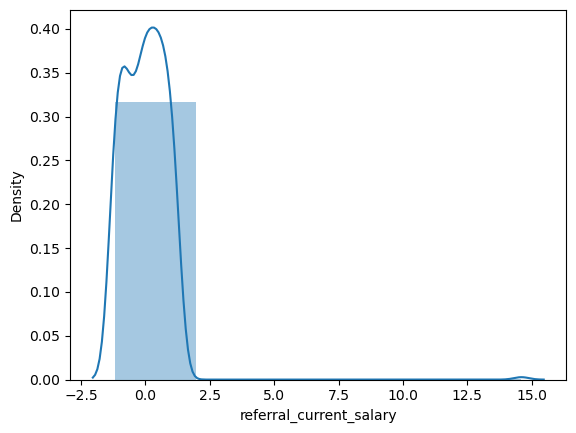

In [20]:
# Distribution after zscore encoding
sns.distplot(z_scaled['referral_current_salary'],bins=5)

No diffrences in data spread but scale have changed.

# Scaling Method 2 (StandardScalar)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
std = StandardScaler()

In [23]:
std_scaled = std.fit_transform(df[num])

In [24]:
std_scaled=pd.DataFrame(std_scaled,columns=df[num].columns)

In [25]:
std_scaled.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-1.085749e-16,9.878538e-17,-4.449792e-17,1.168515e-15,5.842576e-16,1.181420e-16,-8.080822e-16,3.666628e-16,4.583285e-17,-1.184201e-16,-1.263741e-16,-1.174745e-16,-2.227677e-17,9.166571e-17
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-2.498982e+00,-1.171107e+00,-1.170604e+00,-1.656266e+00,-5.995608e+00,-1.655236e+00,-1.746989e+00,-1.173312e+00,-1.644252e+00,-1.754718e+00,-1.754688e+00,-1.622621e+00,-8.464606e-01,-1.179563e+00
25%,-7.190903e-01,-7.875531e-01,-7.897520e-01,-8.970373e-01,-7.763793e-01,-8.950994e-01,-8.863596e-01,-7.975362e-01,-8.783234e-01,-8.277956e-01,-7.971391e-01,-9.369484e-01,-4.824935e-01,-7.990954e-01
50%,-7.133833e-03,-2.044594e-02,-2.804869e-02,5.199914e-02,-4.385598e-02,-1.189864e-02,-2.573054e-02,-9.722615e-02,-4.356474e-02,-8.235822e-03,-1.674821e-02,9.156072e-02,-1.185264e-01,-1.913773e-02
75%,7.048227e-01,7.466613e-01,7.526972e-01,9.061319e-01,8.717982e-01,9.102248e-01,9.783367e-01,5.860032e-01,8.788316e-01,8.826257e-01,7.957852e-01,7.772334e-01,4.274243e-01,7.417966e-01
max,1.352004e+01,1.455459e+01,1.459665e+01,2.424590e+00,1.604322e+00,2.430498e+00,2.173655e+00,1.300370e+01,1.801228e+00,1.773487e+00,4.880877e+00,1.462906e+00,1.917173e+01,1.457178e+01


# Scaling Method 3 (Min-Max)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
minmax=MinMaxScaler()

In [28]:
minmax_scaled=minmax.fit_transform(df[num])

In [29]:
minmax_scaled=pd.DataFrame(minmax_scaled,columns=df[num].columns)

# Transformation

In [30]:
# Lets take any one of the featurea and apply transformation.
# Ideally transformations should be done for all the numerical columns

print('Skewness :  {} '.format(df['referral_current_salary'].skew()))
print('Kurtosis :  {} '.format(df['referral_current_salary'].kurtosis()))

Skewness :  6.184346309755603 
Kurtosis :  89.46603642396403 


### Method 1 (log transformations)

In [31]:
import numpy as np

In [32]:
print('Skewness :  {} '.format(np.log(df['referral_current_salary'].skew())))
print('Kurtosis :  {} '.format(np.log(df['referral_current_salary'].kurtosis())))

Skewness :  1.8220213106478522 
Kurtosis :  4.49385907196307 


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='referral_current_salary'>

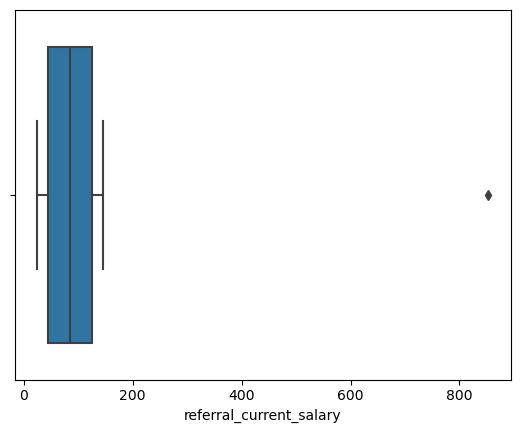

In [33]:
# Before the transformations
sns.boxplot(df['referral_current_salary'])

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='referral_current_salary'>

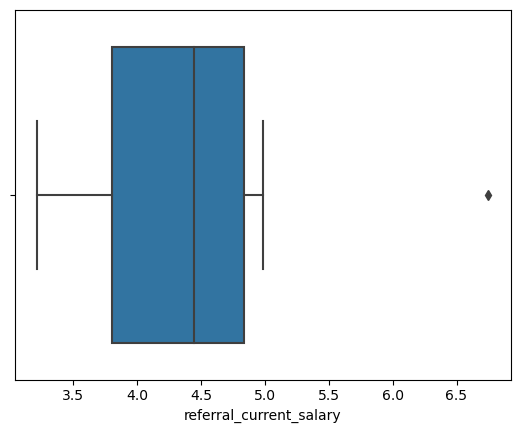

In [34]:
# After the transformations
sns.boxplot(np.log(df['referral_current_salary']))

### Method 2 (sqrt transformations)

In [35]:
print('Skewness :  {} '.format(np.sqrt(df['referral_current_salary'].skew())))
print('Kurtosis :  {} '.format(np.sqrt(df['referral_current_salary'].kurtosis())))

Skewness :  2.4868345963806284 
Kurtosis :  9.458648763114319 


/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='referral_current_salary', ylabel='Density'>

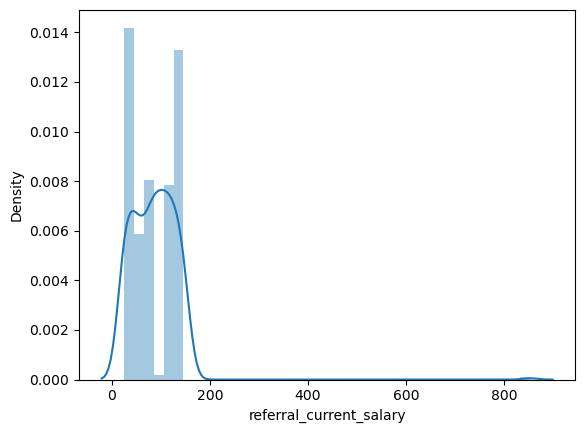

In [36]:
sns.distplot(df['referral_current_salary'])

/home/daniel/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='referral_current_salary', ylabel='Density'>

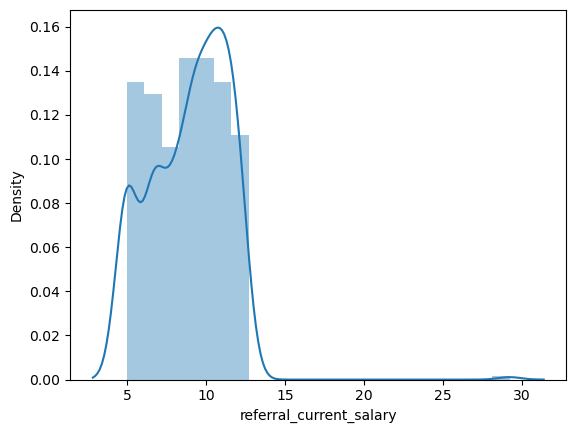

In [37]:
sns.distplot(np.sqrt(df['referral_current_salary']))

### Method 3 (root of 10 transformations)

In [38]:
print('Skewness :  {} '.format((df['referral_current_salary']**0.1).skew()))
print('Kurtosis :  {} '.format((df['referral_current_salary']**0.1).kurtosis()))

Skewness :  -0.3950105143684112 
Kurtosis :  0.04120887026425146 


Out of above three transformation technique root of 10 is giving better results.
We can choose the transformation technique with respective to the Algorithm we use.
Note : We need to trnaform the values back to the original format once model built and predicted.

# Outlier Treatment

In [39]:
df['referral_current_salary1']=df['referral_current_salary']
df['referral_current_salary2']=df['referral_current_salary']

#### Z Score Method

In [40]:
df['referral_current_salary_zscore']=(df.referral_current_salary - df.referral_current_salary.mean())/df.referral_current_salary.std()

In [41]:
df['referral_current_salary'].describe()

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: referral_current_salary, dtype: float64

In [42]:
df['referral_current_salary_zscore'].describe()

count    4.990000e+02
mean     1.824415e-17
std      1.000000e+00
min     -1.169430e+00
25%     -7.889603e-01
50%     -2.802057e-02
75%      7.519426e-01
max      1.458202e+01
Name: referral_current_salary_zscore, dtype: float64

<AxesSubplot:>

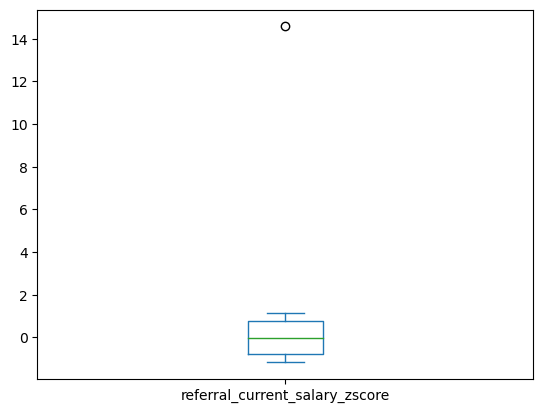

In [43]:
df['referral_current_salary_zscore'].plot(kind='box')

<AxesSubplot:>

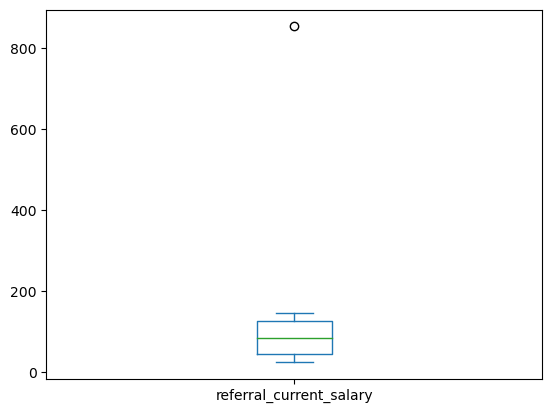

In [44]:
df['referral_current_salary'].plot(kind='box')

In [45]:
# outlier if greater than 3
df[df['referral_current_salary_zscore'] > 3]

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,...,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined,referral_current_salary1,referral_current_salary2,referral_current_salary_zscore
354,65,42.0,Mumbai,853,61.0,95,61.0,68.0,Male,870.0,...,33.48,29.13,7.0,3,868,EL0,No,853,853,14.582021


In [46]:
# outlier if lessthan -3
df[df['referral_current_salary_zscore'] < -3]

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,...,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined,referral_current_salary1,referral_current_salary2,referral_current_salary_zscore


In [47]:
# Calculate zscore impute values
referral_current_salary_zscore=(3*df.referral_current_salary.std())+df.referral_current_salary.std()
round(referral_current_salary_zscore)

210

In [48]:
list1=df[df['referral_current_salary_zscore'] > 3].index

In [49]:
list1

Int64Index([354], dtype='int64')

In [50]:
df['referral_current_salary']=np.where(df.index.isin(list1),round(referral_current_salary_zscore),df['referral_current_salary'])

In [51]:
df['referral_current_salary'].describe()

count    499.000000
mean      85.184369
std       40.154397
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      210.000000
Name: referral_current_salary, dtype: float64

<AxesSubplot:>

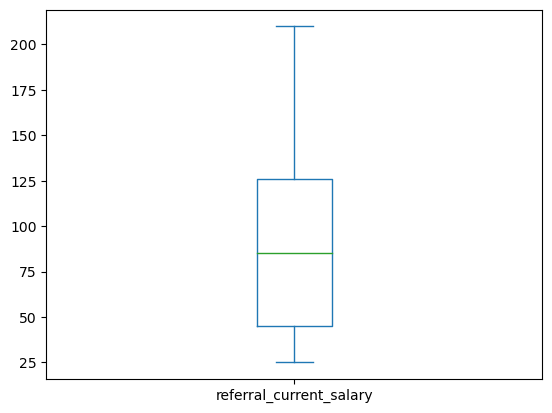

In [52]:
df['referral_current_salary'].plot(kind='box')

In [53]:
df.drop(columns=['referral_current_salary_zscore'],inplace=True)

#### Box plot Method

In [54]:
def detect_outlier(col):
    Q3,Q1=np.percentile(col,[75,25])
    iqr=Q3-Q1
    lower_outlier_range=Q1-(1.5*iqr)
    upper_outlier_range=Q3+(1.5*iqr)
    return lower_outlier_range,upper_outlier_range

In [55]:
lr,ur=detect_outlier(df['referral_current_salary'])

In [56]:
print('Lower Range : {} Outer Range : {}'.format(lr,ur))

Lower Range : -76.5 Outer Range : 247.5


# Encoding

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_age                         499 non-null    int64  
 1   referral_exp_in_years                499 non-null    float64
 2   referral_preferred_city              499 non-null    object 
 3   referral_current_salary              499 non-null    int64  
 4   referral_10_th_marks                 499 non-null    float64
 5   referral_12th_marks                  499 non-null    int64  
 6   referral_graduation_marks            499 non-null    float64
 7   referral_post_grad_marks             499 non-null    float64
 8   referral_gender                      499 non-null    object 
 9   referral_expected_sal                499 non-null    float64
 10  referral_aptitude_numerical_score    499 non-null    float64
 11  referral_aptitude_verbal_score  

In [58]:
cat_cols = []
for col in df.columns:
    if df[col].dtype =='object':
        cat_cols.append(col)
        

In [59]:
print(cat_cols)

['referral_preferred_city', 'referral_gender', 'Emp_Salary_Grade', 'Joined']


In [60]:
df['Joined'].value_counts()

No     261
Yes    238
Name: Joined, dtype: int64

In [61]:
df['Joined'] = np.where(df['Joined'] == 'Yes',1,0)

In [62]:
df['Joined'].value_counts()

0    261
1    238
Name: Joined, dtype: int64

 ## Label Encoding

In [63]:
df['referral_preferred_city'] = df['referral_preferred_city'].astype('category')

In [64]:
df['referral_preferred_city'].value_counts()

Mumbai       232
Bangalore    142
Delhi         93
Pune          32
Name: referral_preferred_city, dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   referral_age                         499 non-null    int64   
 1   referral_exp_in_years                499 non-null    float64 
 2   referral_preferred_city              499 non-null    category
 3   referral_current_salary              499 non-null    int64   
 4   referral_10_th_marks                 499 non-null    float64 
 5   referral_12th_marks                  499 non-null    int64   
 6   referral_graduation_marks            499 non-null    float64 
 7   referral_post_grad_marks             499 non-null    float64 
 8   referral_gender                      499 non-null    object  
 9   referral_expected_sal                499 non-null    float64 
 10  referral_aptitude_numerical_score    499 non-null    float64 
 11  referral_aptitude_v

In [66]:
df['referral_preferred_city']=df.referral_preferred_city.cat.codes

In [67]:
df['referral_preferred_city'].value_counts()

2    232
0    142
1     93
3     32
Name: referral_preferred_city, dtype: int64

#### Alternate Label Encoding

In [68]:
df['referral_gender'].value_counts()

Male      261
Female    238
Name: referral_gender, dtype: int64

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()

In [71]:
gender_encoded_array=le.fit_transform(df['referral_gender'])

In [72]:
gender_encoded=pd.DataFrame(gender_encoded_array)

In [73]:
df_gen=df.join(gender_encoded)

In [74]:
df_gen.rename(columns={0:'gender'},inplace=True)

In [75]:
df_gen.head(3)

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,...,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined,referral_current_salary1,referral_current_salary2,gender
0,28,5.0,1,106,89.0,72,89.0,83.0,Male,123.0,...,33.04,23.314248,10.0,3,141,EL0,1,106,106,1
1,26,3.0,3,65,63.0,77,63.0,85.0,Male,83.0,...,27.39,20.870000,10.0,10,80,ML0,1,65,65,1
2,23,2.0,2,45,92.0,85,92.0,72.0,Male,62.0,...,2.61,40.000000,2.0,1,60,EL0,0,45,45,1


In [76]:
df['referral_gender'].value_counts()

Male      261
Female    238
Name: referral_gender, dtype: int64

In [77]:
df_gen['gender'].value_counts()

1    261
0    238
Name: gender, dtype: int64

## One Hot Encoding

#### Method 1

In [78]:
cat_cols.remove('referral_preferred_city')

In [79]:
cat_cols.remove('Joined')

In [80]:
cat_cols

['referral_gender', 'Emp_Salary_Grade']

In [81]:
df[cat_cols].head(4)

,referral_gender,Emp_Salary_Grade
0,Male,EL0
1,Male,ML0
2,Male,EL0
3,Male,ML0


In [82]:
df['referral_gender'].value_counts()

Male      261
Female    238
Name: referral_gender, dtype: int64

In [83]:
df_new=pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [84]:
df_new.head()

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,...,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Joined,referral_current_salary1,referral_current_salary2,referral_gender_Male,Emp_Salary_Grade_EL0,Emp_Salary_Grade_ML0
0,28,5.0,1,106,89.0,72,89.0,83.0,123.0,10.00,...,23.314248,10.0,3,141,1,106,106,1,1,0
1,26,3.0,3,65,63.0,77,63.0,85.0,83.0,6.09,...,20.870000,10.0,10,80,1,65,65,1,0,1
2,23,2.0,2,45,92.0,85,92.0,72.0,62.0,41.74,...,40.000000,2.0,1,60,0,45,45,1,1,0
3,29,6.0,0,126,60.0,95,60.0,67.0,146.0,31.30,...,23.480000,9.0,3,142,1,126,126,1,0,1
4,26,3.0,2,65,92.0,70,92.0,92.0,83.0,25.65,...,16.520000,7.0,4,89,1,65,65,0,1,0


 #### Method 2

In [85]:
from sklearn.preprocessing import OneHotEncoder

In [86]:
df['referral_gender']=df['referral_gender'].astype('category')
df['Emp_Salary_Grade']=df['Emp_Salary_Grade'].astype('category')

In [87]:
df.referral_gender.cat.categories

Index(['Female', 'Male'], dtype='object')

In [88]:
df.Emp_Salary_Grade.cat.categories

Index(['EE0', 'EL0', 'ML0'], dtype='object')

In [89]:
df['referral_gender_new']=df.referral_gender.cat.codes
#df['Emp_Salary_Grade_New']=df.Emp_Salary_Grade.cat.codes

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   referral_age                         499 non-null    int64   
 1   referral_exp_in_years                499 non-null    float64 
 2   referral_preferred_city              499 non-null    int8    
 3   referral_current_salary              499 non-null    int64   
 4   referral_10_th_marks                 499 non-null    float64 
 5   referral_12th_marks                  499 non-null    int64   
 6   referral_graduation_marks            499 non-null    float64 
 7   referral_post_grad_marks             499 non-null    float64 
 8   referral_gender                      499 non-null    category
 9   referral_expected_sal                499 non-null    float64 
 10  referral_aptitude_numerical_score    499 non-null    float64 
 11  referral_aptitude_v

In [91]:
oe= OneHotEncoder(handle_unknown='ignore')

One hot encoding algorithm is an encoding system of Sci-kit learn library. One Hot Encoding is used to convert numerical categorical variables into binary vectors. Before implementing this algorithm. Make sure the categorical values must be label encoded as one hot encoding takes only numerical categorical values. 

In [92]:
encoded=oe.fit_transform(df[['referral_gender_new']])

In [93]:
df_encoded=pd.DataFrame(encoded.toarray())

In [94]:
df_n=df.join(df_encoded)

In [95]:
df_n.head()

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,...,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined,referral_current_salary1,referral_current_salary2,referral_gender_new,0,1
0,28,5.0,1,106,89.0,72,89.0,83.0,Male,123.0,...,10.0,3,141,EL0,1,106,106,1,0.0,1.0
1,26,3.0,3,65,63.0,77,63.0,85.0,Male,83.0,...,10.0,10,80,ML0,1,65,65,1,0.0,1.0
2,23,2.0,2,45,92.0,85,92.0,72.0,Male,62.0,...,2.0,1,60,EL0,0,45,45,1,0.0,1.0
3,29,6.0,0,126,60.0,95,60.0,67.0,Male,146.0,...,9.0,3,142,ML0,1,126,126,1,0.0,1.0
4,26,3.0,2,65,92.0,70,92.0,92.0,Female,83.0,...,7.0,4,89,EL0,1,65,65,0,1.0,0.0


In [96]:
df_n.drop(columns=[0,1],inplace=True)

In [97]:
df_n.head()

,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,...,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined,referral_current_salary1,referral_current_salary2,referral_gender_new
0,28,5.0,1,106,89.0,72,89.0,83.0,Male,123.0,...,33.04,23.314248,10.0,3,141,EL0,1,106,106,1
1,26,3.0,3,65,63.0,77,63.0,85.0,Male,83.0,...,27.39,20.870000,10.0,10,80,ML0,1,65,65,1
2,23,2.0,2,45,92.0,85,92.0,72.0,Male,62.0,...,2.61,40.000000,2.0,1,60,EL0,0,45,45,1
3,29,6.0,0,126,60.0,95,60.0,67.0,Male,146.0,...,9.13,23.480000,9.0,3,142,ML0,1,126,126,1
4,26,3.0,2,65,92.0,70,92.0,92.0,Female,83.0,...,30.43,16.520000,7.0,4,89,EL0,1,65,65,0


# Encoding and Scaling Using Pipeline

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [120]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler

In [100]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.1.1.


In [153]:
def data_pipeline(cols_label,cols_onehot,cols_std):
    one_hot_pipeline=Pipeline([
        ('one_hot_encoding',OneHotEncoder(handle_unknown='ignore'))
    ])
    
    label_pipeline=Pipeline([
        ('label_encoding',LabelEncoder())
    ])
    
    stad_scalar_pipeline=Pipeline([
        ('z_scalar',StandardScaler(with_mean=True, with_std=True))
    ])
    
    transformer=ColumnTransformer([
        ('oe',one_hot_pipeline,cols_onehot),
        #('le',label_pipeline,cols_label),
        ('zscore',stad_scalar_pipeline,cols_std)
    ])
    
    full_pipeline=Pipeline([
        ('transformer',transformer)
    ])
    
    return full_pipeline

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   referral_age                         499 non-null    int64   
 1   referral_exp_in_years                499 non-null    float64 
 2   referral_preferred_city              499 non-null    int8    
 3   referral_current_salary              499 non-null    int64   
 4   referral_10_th_marks                 499 non-null    float64 
 5   referral_12th_marks                  499 non-null    int64   
 6   referral_graduation_marks            499 non-null    float64 
 7   referral_post_grad_marks             499 non-null    float64 
 8   referral_gender                      499 non-null    category
 9   referral_expected_sal                499 non-null    float64 
 10  referral_aptitude_numerical_score    499 non-null    float64 
 11  referral_aptitude_v

In [155]:
label_encode_col=['Emp_Salary_Grade']
one_hot_encode_col=['referral_gender']
scaling_cols=['referral_expected_sal','Salary offered','referral_current_salary']

In [156]:
input_preprocessor = data_pipeline(label_encode_col,one_hot_encode_col,scaling_cols)

In [157]:
df_trans=input_preprocessor.fit_transform(df)

In [159]:
pd.DataFrame(df_trans)

,0,1,2,3,4
0,0.0,1.0,0.244389,0.741797,0.518910
1,0.0,1.0,-0.438841,-0.418628,-0.503173
2,0.0,1.0,-0.797536,-0.799095,-1.001751
3,0.0,1.0,0.637245,0.760820,1.017487
4,1.0,0.0,-0.438841,-0.247418,-0.503173
...,...,...,...,...,...
494,0.0,1.0,-1.139151,-1.179563,-1.500328
495,1.0,0.0,-0.148468,-1.179563,-1.500328
496,0.0,1.0,1.559605,1.122264,1.516065
497,1.0,0.0,0.876376,1.065194,1.441278
